In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
import optax

# import matplotlib
# matplotlib.use('TkAgg') # need this on my machine for some reason
import matplotlib.pyplot as plt
import wandb
import pickle
import os

# %pip uninstall nmrnn
# %pip install git+https://github.com/lindermanlab/nm-rnn.git@main
from nmrnn.data_generation import sample_all
from nmrnn.util import random_nmrnn_params, log_wandb_model, load_wandb_model
from nmrnn.fitting import fit_mwg_nm_rnn, fit_mwg_nm_only
from nmrnn.rnn_code import batched_nm_rnn
!wandb login

wandb: Currently logged in as: jcostacurta11. Use `wandb login --relogin` to force relogin


In [4]:
wandb.init(entity='nm-rnn', project='nm-rnn-mwg', id='y75s2gnj', resume='allow')

model = load_wandb_model('nm-rnn/nm-rnn-mwg/nmrnn_r3_n100_m5:v10')


wandb: WARNING No requirements.txt found, not creating job artifact. See https://docs.wandb.ai/guides/launch/create-job


wandb:   1 of 1 files downloaded.  


/var/folders/8g/txhrz9cj65966xcf7jyfx5200000gn/T/ipykernel_29272/4228860120.py:24: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use ax.tick_params and colorbar.set_label instead.
  ax.cax.toggle_label(True)


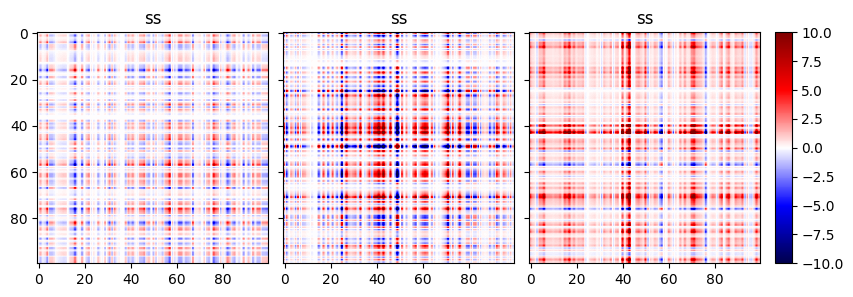

In [66]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(9.75, 3))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
for r, ax in enumerate(grid):
    rank_component = (model['column_factors'][:,r][:,None] @ model['column_factors'][:,r][None,:])
    im = ax.imshow(rank_component,cmap='seismic', vmax=10, vmin=-10)
    ax.set_title('ss')

# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)

#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

In [25]:
model['column_factors'][:,0]

Array([ 0.09419285,  1.2800274 ,  0.2874458 ,  0.5480968 ,  1.9637328 ,
       -0.9705446 , -0.99976474, -0.60790765,  0.21481973,  0.3951854 ,
        0.52511483,  0.6436975 ,  0.61600727, -0.0997286 , -0.83325535,
       -0.9408599 , -2.800055  , -0.38112795,  0.22362542, -1.7012966 ,
       -0.05646899,  0.8505757 ,  1.4434314 , -0.38812408,  0.4208213 ,
        0.09137273, -1.1643137 , -0.23752224,  0.20903437, -1.0741444 ,
        0.52337575,  1.7026951 , -1.2772844 ,  1.156608  ,  0.3994595 ,
       -0.3285633 ,  0.04392838,  0.0046283 , -1.1457636 ,  1.3246151 ,
        0.6496891 ,  1.3480855 ,  0.27998835, -0.36172676,  1.1953816 ,
        1.2450017 ,  1.7378381 , -0.69914556, -1.1432742 ,  0.01876377,
       -1.2228329 ,  1.0628679 , -0.41921806, -0.3812989 , -1.0290393 ,
        1.1903961 ,  1.463717  ,  3.1094642 , -0.77386606,  0.6688965 ,
        0.24067245,  1.7265773 ,  1.6992986 ,  0.39294347,  1.3623278 ,
        1.1066735 ,  0.67042476, -2.0558743 ,  0.2584458 ,  0.27